In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [ ]:
from numpy.random import seed
seed(8) #1
#from tensorflow import  set_random_seed
 #2

tf.random.set_seed(7)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


In [ ]:
from os import listdir
data_list = listdir('/content/drive/MyDrive/Places2')

#Delete some classes that may interfere


data_list

['train', 'test']

In [ ]:
pip install keras --user

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf

In [ ]:
DATASET_PATH  = '/content/drive/MyDrive/Places2/train'
test_dir =  '/content/drive/MyDrive/Places2/test'
IMAGE_SIZE    = (256, 256)
NUM_CLASSES   = len(data_list)
BATCH_SIZE    = 128 # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 10
LEARNING_RATE = 0.0001 #start off with high rate first 0.001 #5e-4


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='constant')

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
train_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  class_mode="categorical",
                                                 
                                                  )

Found 4651 images belonging to 2 classes.


In [ ]:
valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  class_mode="categorical",
                                                  
                                                 
                                                  )

Found 1162 images belonging to 2 classes.


In [ ]:
from keras import models
from keras import layers
from tensorflow.keras.applications import VGG16
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda

In [ ]:
SHAPE_INP=(256,256, 3)
input_shape=(None,256,256, 3)

In [ ]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape= SHAPE_INP)

conv_base.trainable = False


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              
              optimizer=optimizers.Adam(learning_rate= LEARNING_RATE),
              metrics=['acc'])

In [ ]:
#model.build(input_shape) # `input_shape` is the shape of the input data
                         # e.g. input_shape = (None, 32, 32, 3)
#model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

callbacks = EarlyStopping(monitor='val_loss', patience=2)
result=model.fit(train_batches,
    epochs=50,
    validation_data = valid_batches,
    initial_epoch=0,
    steps_per_epoch =STEP_SIZE_TRAIN,
    validation_steps = STEP_SIZE_VALID)

37
10


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
36/36 [==============================] - 1305s 36s/step - loss: 0.7080 - acc: 0.6111 - val_loss: 0.5610 - val_acc: 0.7066
Epoch 2/50
36/36 [==============================] - 120s 3s/step - loss: 0.4619 - acc: 0.7741 - val_loss: 0.5105 - val_acc: 0.7474
Epoch 3/50
36/36 [==============================] - 104s 3s/step - loss: 0.4092 - acc: 0.8073 - val_loss: 0.4912 - val_acc: 0.7839
Epoch 4/50
36/36 [==============================] - 103s 3s/step - loss: 0.4093 - acc: 0.8170 - val_loss: 0.5068 - val_acc: 0.7648
Epoch 5/50
36/36 [==============================] - 104s 3s/step - loss: 0.4064 - acc: 0.8162 - val_loss: 0.5020 - val_acc: 0.7691
Epoch 6/50
36/36 [==============================] - 104s 3s/step - loss: 0.4004 - acc: 0.8256 - val_loss: 0.4955 - val_acc: 0.7648
Epoch 7/50
36/36 [==============================] - 103s 3s/step - loss: 0.3756 - acc: 0.8357 - val_loss: 0.4774 - val_acc: 0.7821
Epoch 8/50
36/36 [==============================] - 102s 3s/step - loss: 0.3617 -

In [ ]:
import matplotlib.pyplot as plt

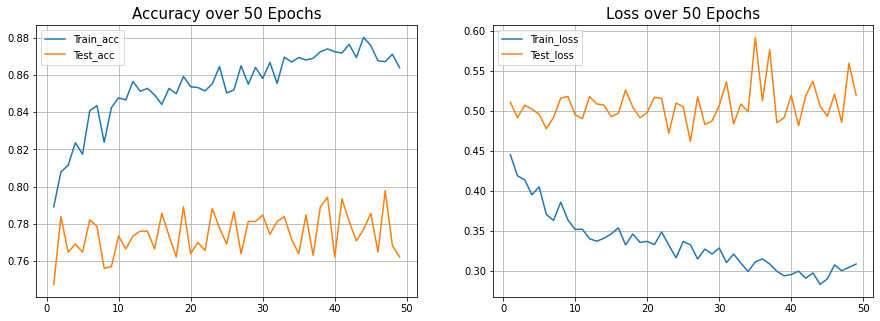

In [ ]:
def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
plot_acc_loss(result, 50)

In [ ]:
model.save('placesVGG.h5')

NotImplementedError: ignored

In [ ]:
model.save_weights(filepath='final_weightVGGplaces.hdf5')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(
        test_dir,target_size=IMAGE_SIZE,
        batch_size=1,
        shuffle=False,
        seed=42,
        
        
        class_mode="categorical")
eval_generator.reset()

Found 1454 images belonging to 2 classes.


In [ ]:
eval_generator.reset()  
x = model.evaluate(eval_generator,  
                           steps = np.ceil(len(eval_generator) / 128),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1
                   
      
      
                           )


print('Test loss:' , x[0])
print('Test accuracy:',x[1])

12/12 [==============================] - 1s 57ms/step - loss: 0.4846 - acc: 0.8333
Test loss: 0.484604150056839
Test accuracy: 0.8333333134651184


In [ ]:
preds = model.evaluate(eval_generator,batch_size=1,steps = np.ceil(len(eval_generator) / 1),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1)
print ("Validation Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

1454/1454 [==============================] - 67s 46ms/step - loss: 0.3757 - acc: 0.8363
Validation Loss = 0.3756835460662842
Validation Accuracy = 0.8363136053085327


In [ ]:
eval_generator.reset()  
pred = model.predict(eval_generator,steps = np.ceil(len(eval_generator) / 1),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1)
print("Predictions finished")

1454/1454 [==============================] - 62s 43ms/step
Predictions finished


In [ ]:
print(pred)

[[0.3408857  0.6591143 ]
 [0.964976   0.03502392]
 [0.997035   0.00296493]
 ...
 [0.22798358 0.7720164 ]
 [0.0334254  0.9665746 ]
 [0.2409527  0.75904727]]


In [ ]:
pred_labels = np.argmax(pred, axis = 1)

In [ ]:
len(eval_generator.classes)

1454

In [ ]:
len(pred_labels)

1454

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(eval_generator.classes, pred_labels))

              precision    recall  f1-score   support

           0       0.90      0.75      0.81       702
           1       0.79      0.92      0.85       752

    accuracy                           0.84      1454
   macro avg       0.85      0.83      0.83      1454
weighted avg       0.84      0.84      0.83      1454



In [ ]:
from os import listdir
data1_list = listdir('/content/drive/MyDrive/Places2/train')
data1_list

['outdoor', 'indoor']

In [ ]:
dict = eval_generator.class_indices
print(dict)

{'indoor': 0, 'outdoor': 1}


Class name to class id map
 {'indoor': 0, 'outdoor': 1}
           pred
0  1.000000e+00
1  1.061931e-16
Class prediction =  indoor


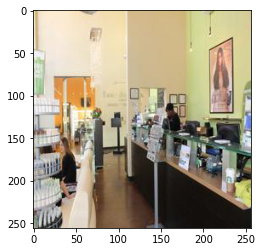

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

IMAGE_SIZE    = (256,256)
# print(data_list)
print("Class name to class id map\n",dict)

test_image = image.load_img(( DATASET_PATH+ "/indoor/00000001 (8).jpg"),target_size =IMAGE_SIZE )
#test_image = image.load_img("../input/natural-images/data/natural_images/cat/cat_0005.jpg",target_size =IMAGE_SIZE )
test_image = image.img_to_array(test_image)

plt.imshow(test_image/255.)

# test_image = np.expand_dims(test_image , axis = 0)
test_image = test_image.reshape((1, test_image.shape[0], test_image.shape[1], test_image.shape[2]))
test_image = preprocess_input(test_image)

prediction = model.predict(test_image)
df = pd.DataFrame({'pred':prediction[0]})
# print(prediction[0])
df = df.sort_values(by='pred', ascending=False, na_position='first')
print(df)

for x in data1_list:
  if dict[x] == (df[df == df.iloc[0]].index[0]):
    print("Class prediction = ", x)
    break